In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import kruskal, sem

from synet.generators import create_temporal_network
from synet.propagators.paint import paint_entropy
from synet.propagators.paths import path_entropy
from synet.propagators.mixing import mixing_entropy
from synet.analysis import entropy_windows
from synet.visualization import plot_entropy_game

In [2]:
np.random.seed(1872631)
n_events=2000
dt = 10
n_sample=10

In [3]:
all_rate_intern = [10, 20, 50, 100]
path_kruskal = []
mix_kruskal = []
path_error = []
mix_error = []

for rate_intern in all_rate_intern:
    cur_d_mix = []
    cur_d_path = []
    for _ in range(n_sample):
        A, event_list, event_participants = create_temporal_network(n_events=n_events, rate_intern=rate_intern)

        eq_start = n_events//10
        eq_end = 9*n_events//10

        close_mixing = np.zeros(n_events, dtype=int)
        for event in event_list[2]:
            start = max(0, event - dt//2)
            end = min(n_events-1, event + dt//2)
            close_mixing[start:end] = 1
        close_mixing[:eq_start] = -1
        close_mixing[eq_end:] = -1
        mix_idx = np.where(close_mixing == 1)[0]
        separate_idx = np.where(close_mixing == 0)[0]


        paint_t = entropy_windows(A, dt=dt, entropy_game=paint_entropy)
        path_t = entropy_windows(A, dt=dt, entropy_game=path_entropy)
        mixing_t = entropy_windows(A, dt=dt, entropy_game=mixing_entropy)

        cur_paint = kruskal(
            paint_t[mix_idx], paint_t[separate_idx], nan_policy="omit"
        ).statistic
        cur_path = kruskal(
            path_t[mix_idx], path_t[separate_idx], nan_policy="omit"
        ).statistic
        cur_mix = kruskal(
            mixing_t[mix_idx], mixing_t[separate_idx], nan_policy="omit"
        ).statistic

        cur_d_mix.append(cur_mix - cur_paint)
        cur_d_path.append(cur_path - cur_paint)
    path_kruskal.append(np.mean(cur_d_path))
    mix_kruskal.append(np.mean(cur_d_mix))
    path_error.append(sem(cur_d_path))
    mix_error.append(sem(cur_d_mix))
    
        

/home/qubix/Documents/shared_work/network/temporal-network-synthesis/synet/analysis.py:42: RuntimeWarning: invalid value encountered in true_divide
  return results/counts
/home/qubix/Documents/shared_work/network/temporal-network-synthesis/synet/analysis.py:42: RuntimeWarning: invalid value encountered in true_divide
  return results/counts


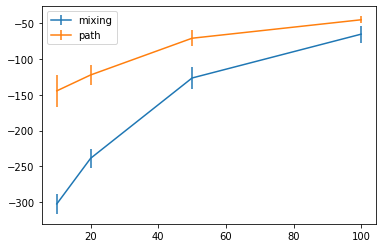

In [7]:
plt.errorbar(all_rate_intern, mix_kruskal, mix_error, label="mixing")
plt.errorbar(all_rate_intern, path_kruskal, path_error, label="path")
plt.legend()
plt.show()


In [5]:
plt.figure(dpi=150)
plot_entropy_game(path_results, paint_results, mixing_results, events=event_list[2])


NameError: name 'path_results' is not defined

<Figure size 900x600 with 0 Axes>

In [ ]:
paint = paint_entropy(A, start=20, end=40)
path = path_entropy(A, start=20, end=40)
mixing = mixing_entropy(A, start=20, end=40)

In [ ]:
plt.plot(paint)
plt.plot(mixing)